In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

#Importing Dataset

In [ ]:
df=pd.read_csv("Automobile_insurance_fraud.csv")
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [ ]:
df.shape

(1000, 40)

- There is 1000 rows and 40 columns in the dataset.

In [ ]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [ ]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

#Checking the Null Values

In [ ]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

- Null Value is detected in _c39 column

In [ ]:
a=[]
for i in df.columns:
  d=df[i].isnull().sum()
  if d>0:
    t=df.shape[0]*0.3
    if d>t:
      a.append(i)
  
for i in a:
  df=df.drop([i],axis=1)

- If data loss is more than 30%, we drop the column.

In [ ]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [ ]:
df["property_damage"].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [ ]:
import re
from sklearn.impute import SimpleImputer
a=[]
for i in df:
  if df[i].dtypes==object:
    for j in df[i].unique():
      reg = re.compile('[@_!#$%^&*()<>?/\|}{~:]')
      if (reg.search(j) == None):
        df[i]=df[i].replace("?",np.nan)
        imp=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
        df[i]=imp.fit_transform(df[i].values.reshape(-1,1))
        

In [ ]:
df["property_damage"].value_counts()

NO     698
YES    302
Name: property_damage, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

#Visualization

In [ ]:
a=[]
for i in df:
  if df[i].dtypes==object:
    a.append(i)
print("Number of Objects: ",len(a))

Number of Objects:  21


OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64
Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64
Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64
Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64
Police       292
Fire         223
Other        198
Ambul

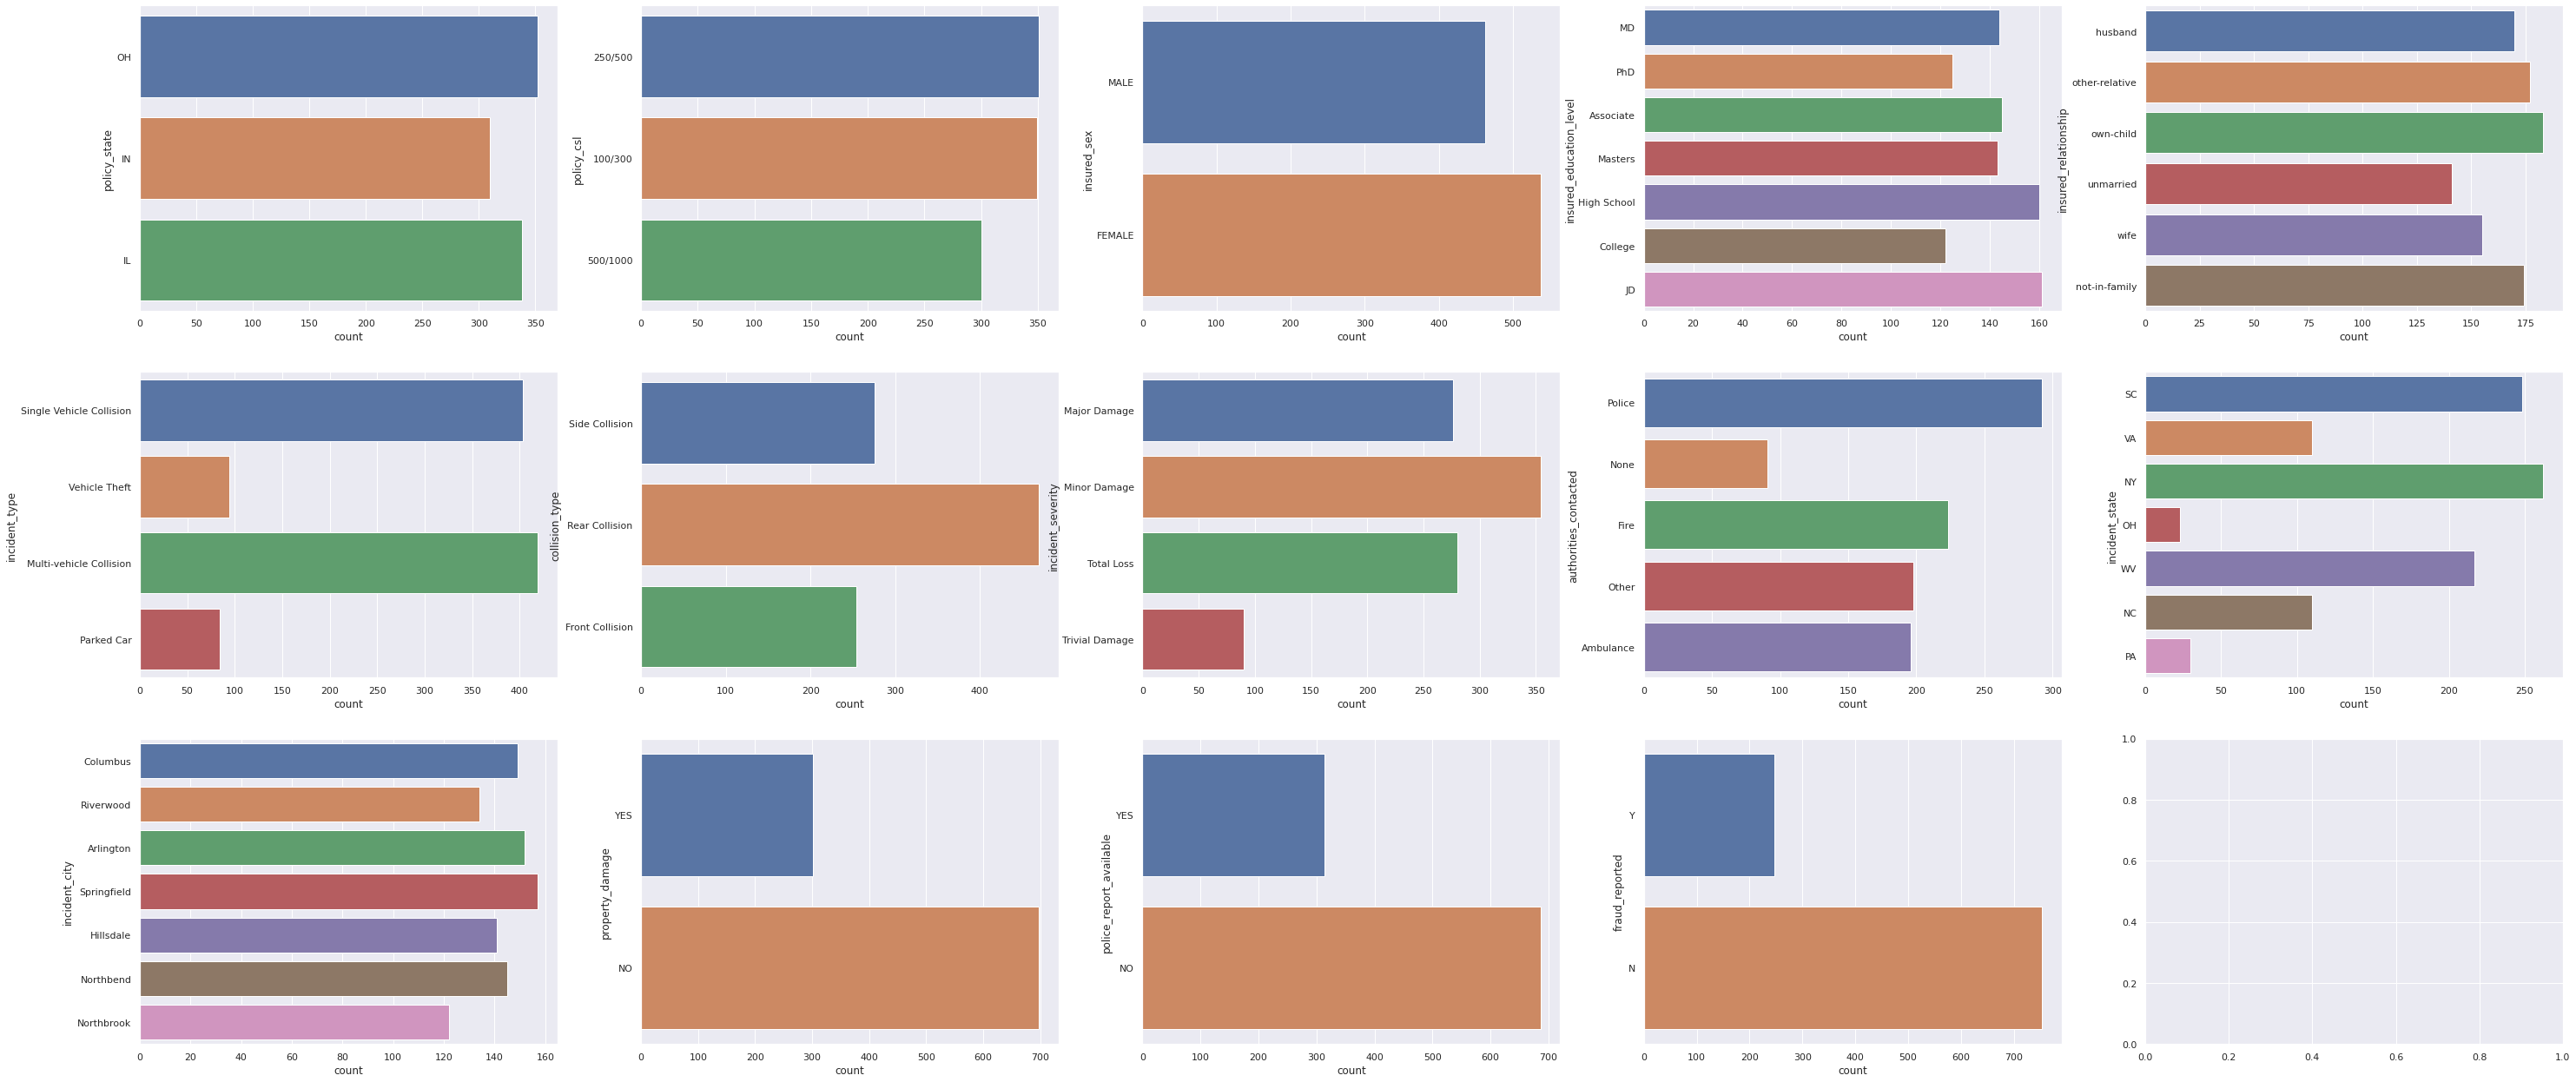

In [ ]:
sns.set()
fig,axes=plt.subplots(3,5,figsize=(50,22))
j=0
k=0
b=["policy_bind_date","incident_location","incident_date","insured_hobbies","insured_occupation","auto_make","auto_model"]
for i in df:
  if df[i].dtypes==object and i not in b:
    sns.countplot(y=df[i],ax=axes[j,k])
    print(df[i].value_counts())
    k=k+1

  if k==5:
    k=0
    j=j+1

policy_state of insured person
- OH   - 352
- IL    - 338
- IN    - 310

policy_csl (Combined Single Limit)
- 250/500     - 351
- 100/300     - 349
- 500/1000    - 300

The gender of the policy holder
- FEMALE    - 537
- MALE      - 463

Education level of the policy holder
- JD             - 161
- High School    - 160
- Associate -     145
- MD         -    144
- Masters     -   143
- PhD          -  125
- College       - 122

Relationship of the policy holder
- own-child       -  183
- other-relative   - 177
- not-in-family -    174
- husband        -   170
- wife            -  155
- unmarried        - 141

Number of incidents in each incident type
- Multi-vehicle Collision   -  419
- Single Vehicle Collision   - 403
- Vehicle Theft              -  94
- Parked Car                  - 84

NUmber of collisions in each collison type
- Rear Collision    - 470
- Side Collision    - 276
- Front Collision   - 254

The severity of the incident
- Minor Damage     - 354
- Total Loss       - 280
- Major Damage     - 276
- Trivial Damage   -  90

Number of times each authority were contacted
- Police      - 292
- Fire        - 223
- Other       - 198
- Ambulance   - 196
- None          - 91

Number of incident occured in each state
- NY (New York) -  262
- SC  (South California) -  248
- WV (West Virginia) -   217
- VA (Virginia) -  110
- NC  (North Carolina) -  110
- PA  (Pennsylvania) -   30
- OH (Ohio) -    23

Number of incident occured in each city
- Springfield    157
- Arlington      152
- Columbus       149
- Northbend      145
- Hillsdale      141
- Riverwood      134
- Northbrook     122

Number of times there was property damage in incident
- No - 698 
- Yes - 302 

Number of times police reoprt was available for the incident
- NO    - 686
- YES   - 314

Fraud Reported
- N (No) -   753
- Y (Yes) -   247


machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64
Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68

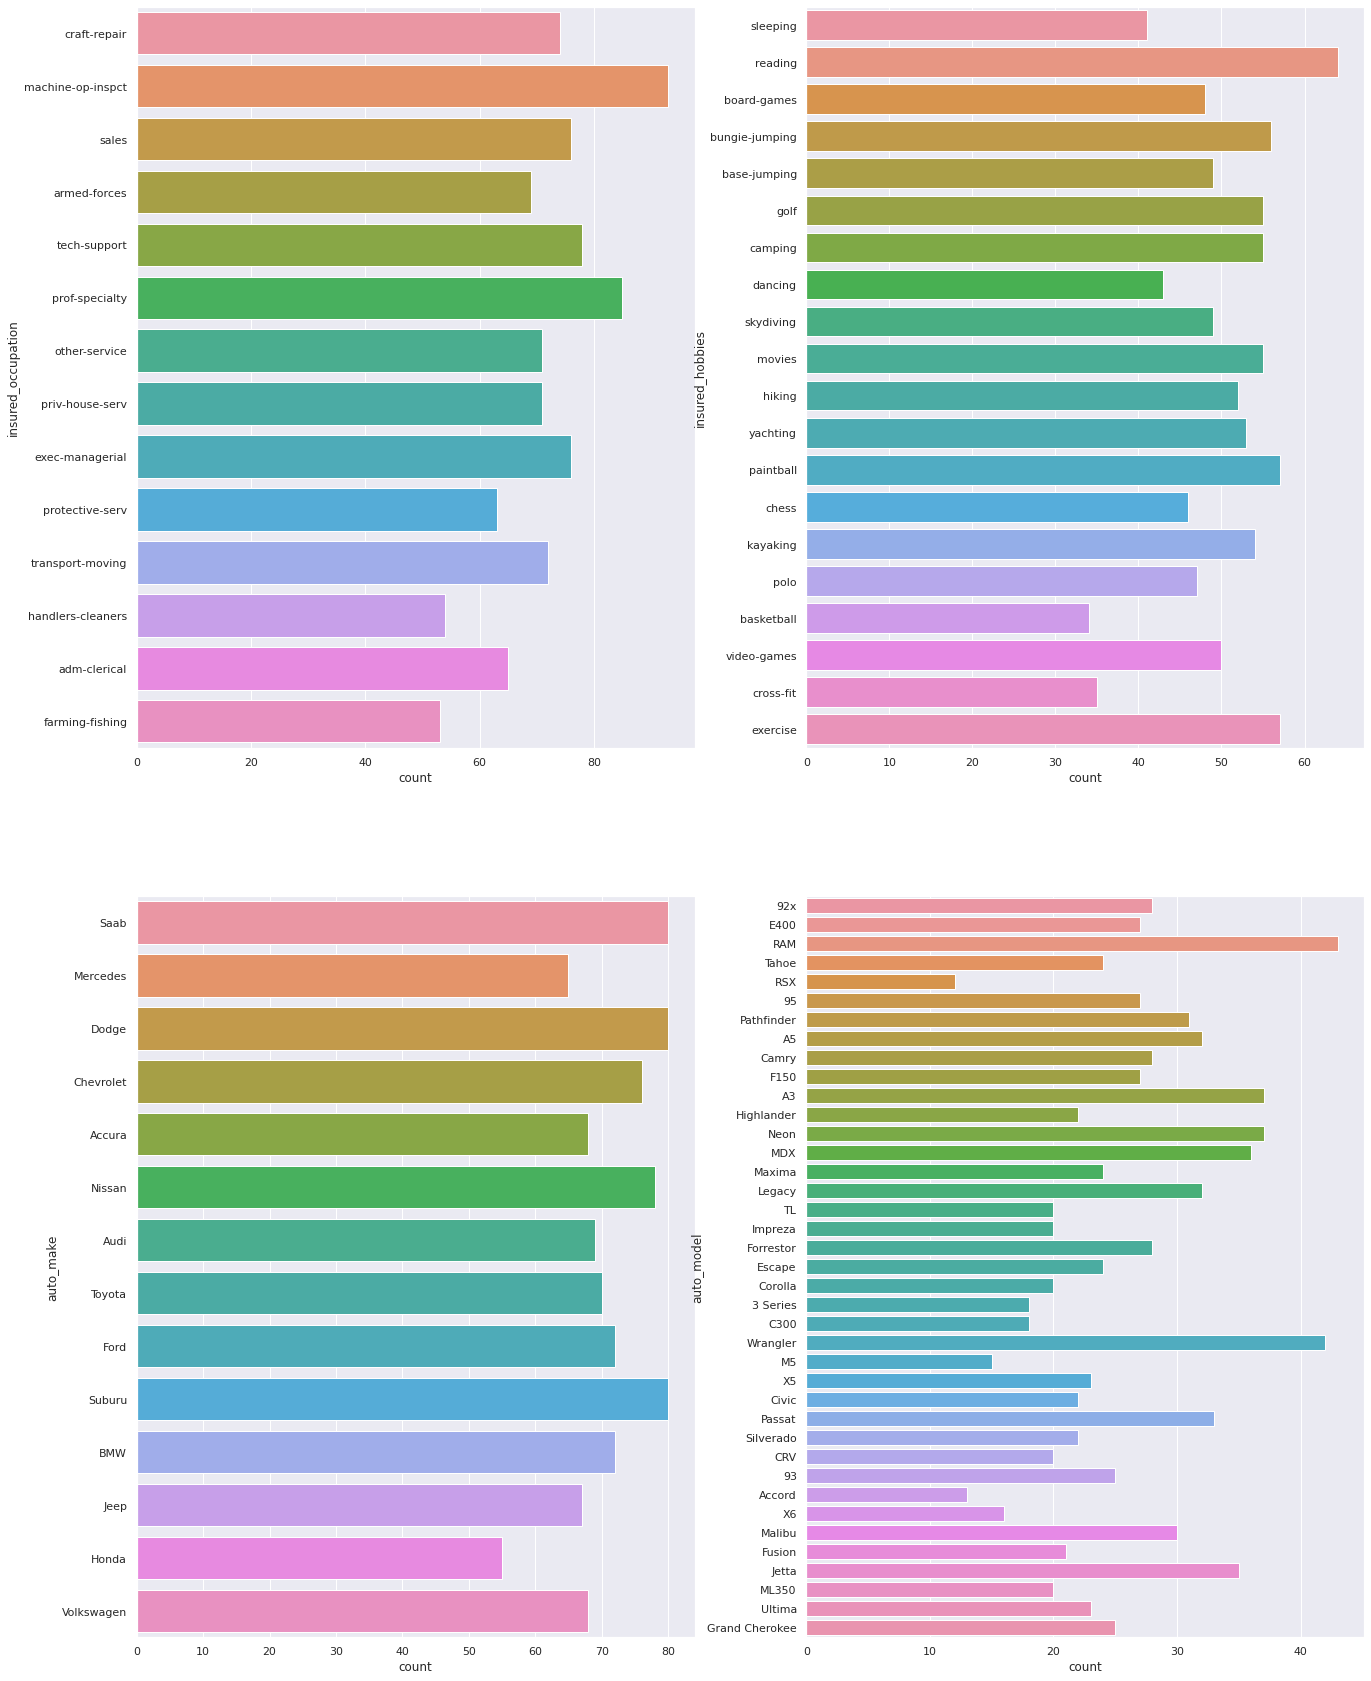

In [ ]:
sns.set()
fig,axes=plt.subplots(2,2,figsize=(22,30))
j=0
k=0
b=["insured_hobbies","insured_occupation","auto_make","auto_model"]
for i in df:
  if i in b:
    sns.countplot(y=df[i],ax=axes[j,k])
    print(df[i].value_counts())
    k=k+1

  if k==2:
    k=0
    j=j+1

Number of policy holder for each occupation 
- machine-op-inspct    - 93
- prof-specialty       - 85
- tech-support         - 78
- sales                - 76
- exec-managerial      - 76
- craft-repair         - 74
- transport-moving     - 72
- other-service        - 71
- priv-house-serv      - 71
- armed-forces         - 69
- adm-clerical         - 65
- protective-serv      - 63
- handlers-cleaners    - 54
- farming-fishing      - 53

Number of policy holder for each hobby  
- reading           - 64
- exercise          - 57
- paintball         - 57
- bungie-jumping    - 56
- movies            - 55
- golf              - 55
- camping           - 55
- kayaking          - 54
- yachting          - 53
- hiking            - 52
- video-games       - 50
- skydiving         - 49
- base-jumping      - 49
- board-games       - 48
- polo              - 47
- chess             - 46
- dancing           - 43
- sleeping          - 41
- cross-fit         - 35
- basketball        - 34

Number of policy holder for each automobile brand
- Saab         - 80
- Dodge        - 80
- Suburu       - 80
- Nissan       - 78
- Chevrolet    - 76
- Ford         - 72
- BMW          - 72
- Toyota       - 70
- Audi         - 69
- Accura       - 68
- Volkswagen   - 68
- Jeep         - 67
- Mercedes     - 65
- Honda        - 55

Number of policy holder for each automobile model
- RAM               43
- Wrangler          42
- A3                37
- Neon              37
- MDX               36
- Jetta             35
- Passat            33
- A5                32
- Legacy            32
- Pathfinder        31
- Malibu            30
- 92x               28
- Camry             28
- Forrestor         28
- F150              27
- 95                27
- E400              27
- 93                25
- Grand Cherokee    25
- Escape            24
- Tahoe             24
- Maxima            24
- Ultima            23
- X5                23
- Highlander        22
- Civic             22
- Silverado         22
- Fusion            21
- ML350             20
- Impreza           20
- Corolla           20
- TL                20
- CRV               20
- C300              18
- 3 Series          18
- X6                16
- M5                15
- Accord            13
- RSX               12

In [ ]:
a=[]
for i in df:
  if df[i].dtypes!=object:
    a.append(i)
print("Number of Non Objects: ",len(a))

Number of Non Objects:  18


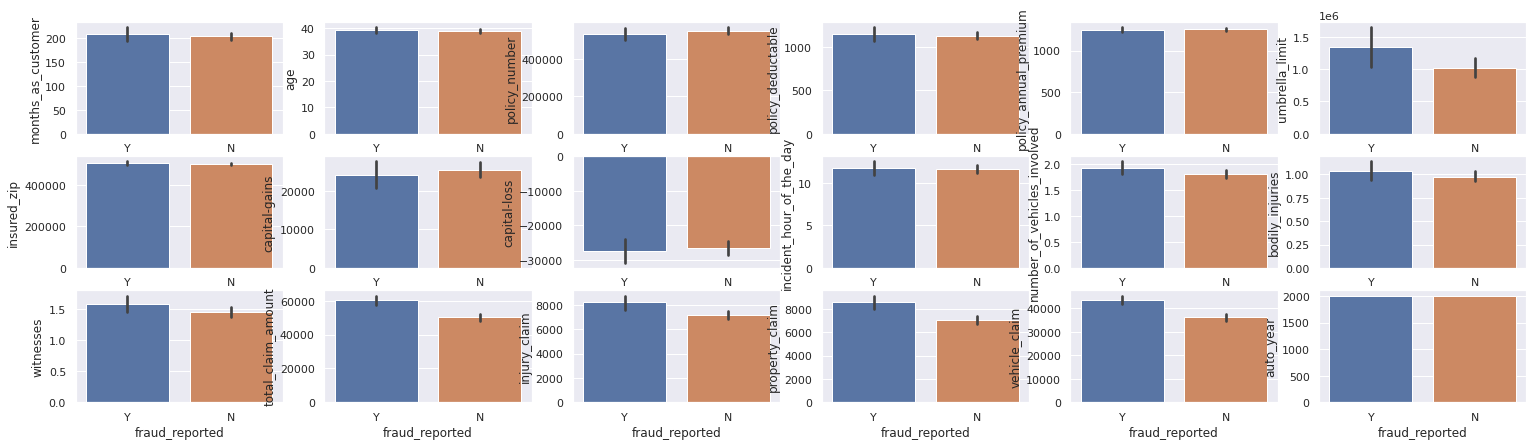

In [ ]:
sns.set()
fig,axes=plt.subplots(3,6,figsize=(26,7))
j=0
k=0
for i in df:
  if df[i].dtypes!=object:
    sns.barplot(x=df["fraud_reported"],y=df[i],ax=axes[j,k])
    k=k+1

  if k==6:
    k=0
    j=j+1

In [ ]:
a=[]
b=[]
for i in df["policy_bind_date"]:
  a.append(i[6:])
for i in df["incident_date"]:
  b.append(i[3:])
c=pd.DataFrame(a)
d=pd.DataFrame(b)

1991    55
2002    50
1990    48
1992    48
1997    44
2014    43
1996    43
2009    43
2006    41
1994    41
2001    41
1999    40
2007    40
2005    40
1995    39
2010    38
2003    37
2004    36
2012    36
2013    35
2008    33
1993    33
2011    32
2000    31
1998    30
2015     3
dtype: int64


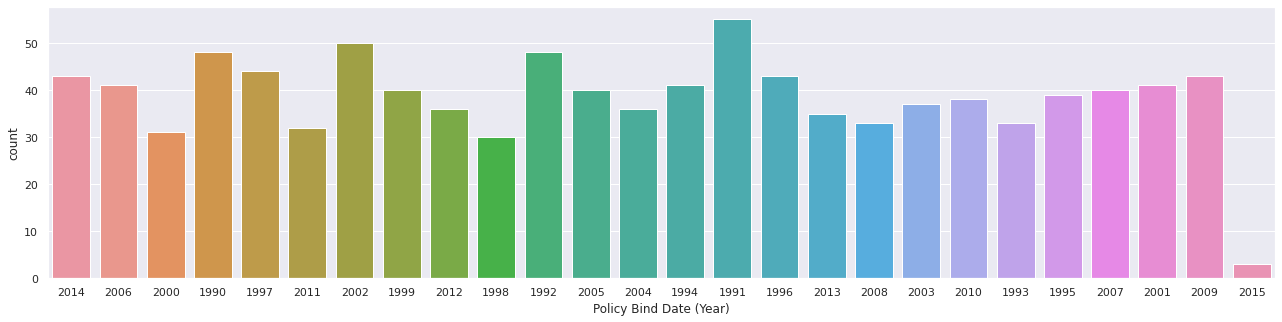

In [ ]:
plt.figure(figsize=(22,5))
sns.countplot(a)
plt.xlabel("Policy Bind Date (Year)")
print(c.value_counts())

Number of Policy Binded in each Year
- 1991    - 55
- 2002    - 50
- 1990    - 48
- 1992    - 48
- 1997    - 44
- 2014    - 43
- 1996    - 43
- 2009    - 43
- 2006    - 41
- 1994    - 41
- 2001    - 41
- 1999    - 40
- 2007    - 40
- 2005    - 40
- 1995    - 39
- 2010    - 38
- 2003    - 37
- 2004    - 36
- 2012    - 36
- 2013    - 35
- 2008    - 33
- 1993    - 33
- 2011    - 32
- 2000    - 31
- 1998    - 30
- 2015    - 3

01-2015    516
02-2015    472
03-2015     12
dtype: int64


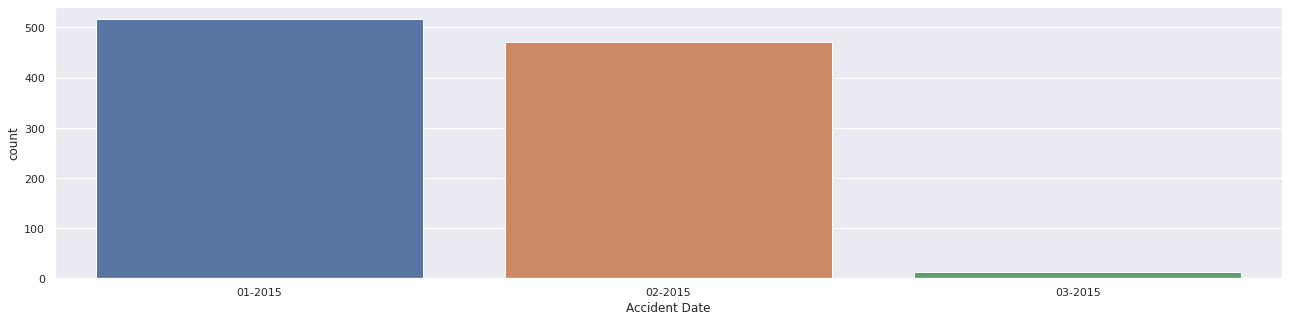

In [ ]:
plt.figure(figsize=(22,5))
sns.countplot(b)
plt.xlabel("Accident Date")
print(d.value_counts())

Number of incidents reported (Month-Year)
- 01-2015    - 516
- 02-2015    - 472
- 03-2015     - 12

All the incidents were reported in year 2015

#Describing Data

In [ ]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


- There is huge gap between 75% and Max value which indicates presence of outlier in SeniorCitizen.

- Data is widely spread in most of the features.

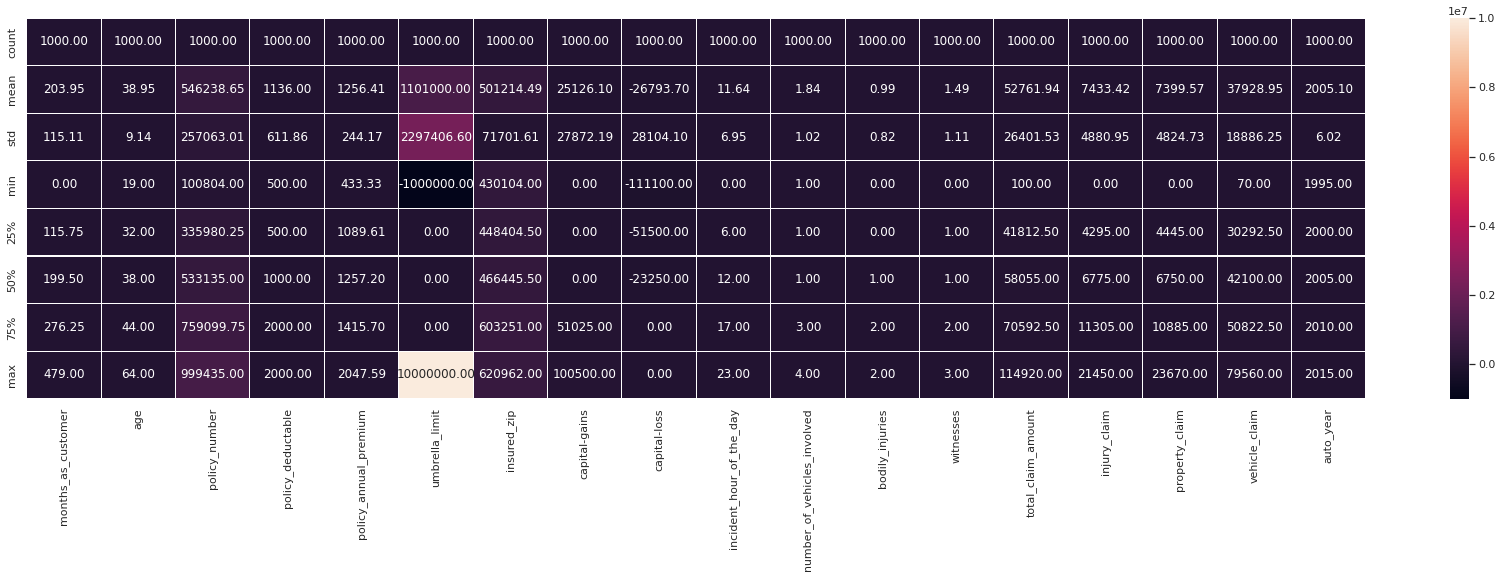

In [ ]:
plt.figure(figsize=(30,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="white",fmt="0.2f")
plt.show()

months_as_customer
- mean -	203.954000	
- std	- 115.113174
- min	- 0.000000
- max	- 479.000000	

age
- mean -	38.948000	
- std	- 9.140287
- min	- 19.000000	
- max	- 64.000000	

policy_number		
- mean -	546238.648000	
- std	- 257063.005276	
- min	- 100804.000000	
- max	- 999435.000000	

policy_deductable
- mean - 1136.000000	
- std	- 611.864673	
- min	- 500.000000	
- max	- 2000.000000

policy_annual_premium	
- mean -	1256.406150	
- std	-	244.167395	
- min	- 433.330000	
- max	- 2047.590000	

umbrella_limit	
- mean -	1.101000e+06	
- std	- 2.297407e+06	
- min	- -1.000000e+06	
- max	- 1.000000e+07	

insured_zip	
- mean -	501214.488000	
- std	-	71701.610941
- min	- 430104.000000	
- max	-	620962.000000	

capital-gains	
- mean -	25126.100000	
- std	- 27872.187708	
- min	- 0.000000	
- max	-	100500.000000	

capital-loss	
- mean -	-26793.700000	
- std	- 28104.096686	
- min	- -111100.000000	
- max	-	0.000000

incident_hour_of_the_day
- mean -	11.644000	
- std	- 6.951373
- min	- 0.000000
- max	- 23.000000	

number_of_vehicles_involved		
- mean - 1.83900	
- std	- 1.01888	
- min	- 1.00000	
- max	- 4.00000	

bodily_injuries
- mean -	0.992000	
- std	- 0.820127	
- min	- 0.000000	
- max	- 2.000000	

witnesses		
- mean -	1.487000	
- std	-	1.111335	
- min	- 0.000000	
- max	- 3.000000

total_claim_amount
- mean -	52761.94000	
- std	- 26401.53319	
- min	-	100.00000	
- max	- 114920.00000		

injury_claim
- mean -	7433.420000
- std	- 4880.951853	
- min	-	0.000000	
- max	- 21450.000000	

property_claim
- mean -	7399.570000	
- std	- 4824.726179	
- min	-	0.000000	
- max	- 23670.000000

vehicle_claim	
- mean -	37928.950000
- std	- 18886.252893	
- min	-		70.000000	
- max	- 79560.000000	
- mean -	1256.406150	

auto_year
- mean -	2005.103000
- std	- 6.015861
- min	-	1995.000000
- max	- 2015.000000	

#Encoding Categorical Features

In [ ]:
for i in df:
  if df[i].dtypes==object:
    print(i)

policy_bind_date
policy_state
policy_csl
insured_sex
insured_education_level
insured_occupation
insured_hobbies
insured_relationship
incident_date
incident_type
collision_type
incident_severity
authorities_contacted
incident_state
incident_city
incident_location
property_damage
police_report_available
auto_make
auto_model
fraud_reported


In [ ]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

le=LabelEncoder()
oe=OrdinalEncoder()
list1=["insured_education_level","incident_severity"]
for i in df:
  if df[i].dtypes==object and i not in list1:
    df[i]=le.fit_transform(df[i].values.reshape(-1,1))
  elif i in list1:
    df[i]=oe.fit_transform(df[i].values.reshape(-1,1))

df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532,2,1,1000,1406.91,0,466132,...,2,1,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,...,3,0,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,...,2,0,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,...,1,0,6500,1300,650,4550,0,31,2009,0


#Detecting Correlation

In [ ]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

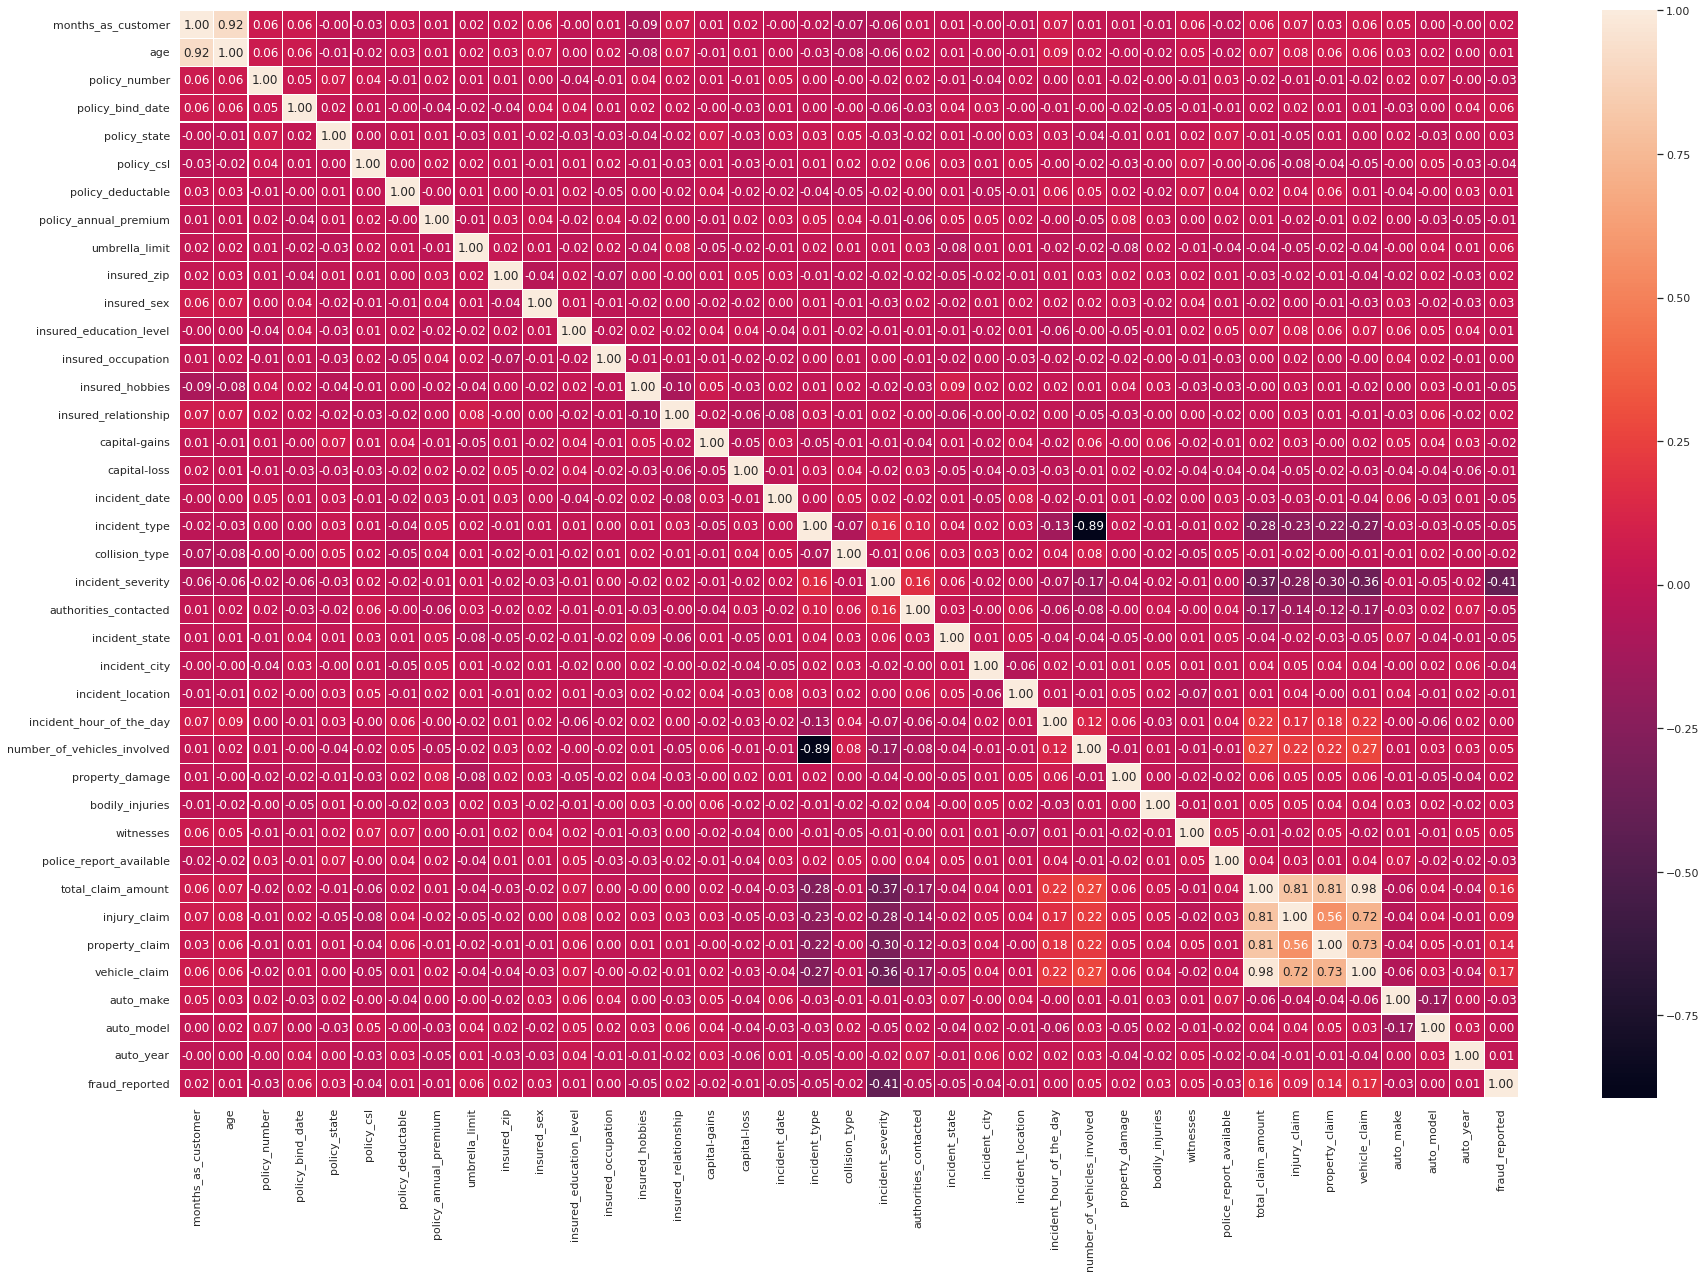

In [ ]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="white",fmt="0.2f")
plt.show()

- months_as_customer has 2 percent correlation with target column which is considered as a very weak +ve bond.
- age has 1 percent correlation with target column which is considered as a very weak +ve bond.
- policy_number has -3 percent correlation with target column which is considered as a very weak +ve bond.
- policy_bind_date has 6 percent correlation with target column which is considered as a very weak +ve bond.
- policy_state has 3 percent correlation with target column which is considered as a very weak +ve bond.
- policy_csl has -4 percent correlation with target column which is considered as a very weak -ve bond.
- policy_deductable has 1 percent correlation with target column which is considered as a very weak +ve bond.
- policy_annual_premium has -1 percent correlation with target column which is considered as a very weak -ve bond.
- umbrella_limit has 6 percent correlation with target column which is considered as a very weak +ve bond.
- insured_zip has 2 percent correlation with target column which is considered as a very weak +ve bond.
- insured_sex has 3 percent correlation with target column which is considered as a very weak +ve bond.
- insured_education_level has 1 percent correlation with target column which is considered as a very weak +ve bond.
- insured_hobbies has -5 percent correlation with target column which is considered as a very weak -ve bond.
- insured_relationship has 2 percent correlation with target column which is considered as a very weak +ve bond.
- capital-gains has -2 percent correlation with target column which is considered as a very weak -ve bond.
- capital-loss has -1 percent correlation with target column which is considered as a very weak -ve bond.
- incident_date has -5 percent correlation with target column which is considered as a very weak -ve bond.
- incident_type has -5 percent correlation with target column which is considered as a very weak -ve bond.
- collision_type has -2 percent correlation with target column which is considered as a very weak -ve bond.
- incident_severity has -41 percent correlation with target column which is considered as a good -ve bond.
- authorities_contacted has -5 percent correlation with target column which is considered as a very weak -ve bond.
- incident_state has -5 percent correlation with target column which is considered as a very weak -ve bond.
- incident_city has -4 percent correlation with target column which is considered as a very weak -ve bond.
- incident_location has -1 percent correlation with target column which is considered as a very weak -ve bond.
- number_of_vehicles_involved has 5 percent correlation with target column which is considered as a very weak +ve bond.
- property_damage has 2 percent correlation with target column which is considered as a very weak +ve bond.
- bodily_injuries has 3 percent correlation with target column which is considered as a very weak +ve bond.
- witnesses has 5 percent correlation with target column which is considered as a very weak +ve bond.
- police_report_available has -3 percent correlation with target column which is considered as a very weak -ve bond.
- total_claim_amount has 16 percent correlation with target column which is considered as a very weak +ve bond.
- injury_claim has 9 percent correlation with target column which is considered as a very weak +ve bond.
- property_claim has 14 percent correlation with target column which is considered as a very weak +ve bond.
- vehicle_claim has 17 percent correlation with target column which is considered as a very weak +ve bond.
- auto_make has -3 percent correlation with target column which is considered as a very weak -ve bond.
- auto_year has 1 percent correlation with target column which is considered as a very weak +ve bond.

#Detecting Outliers

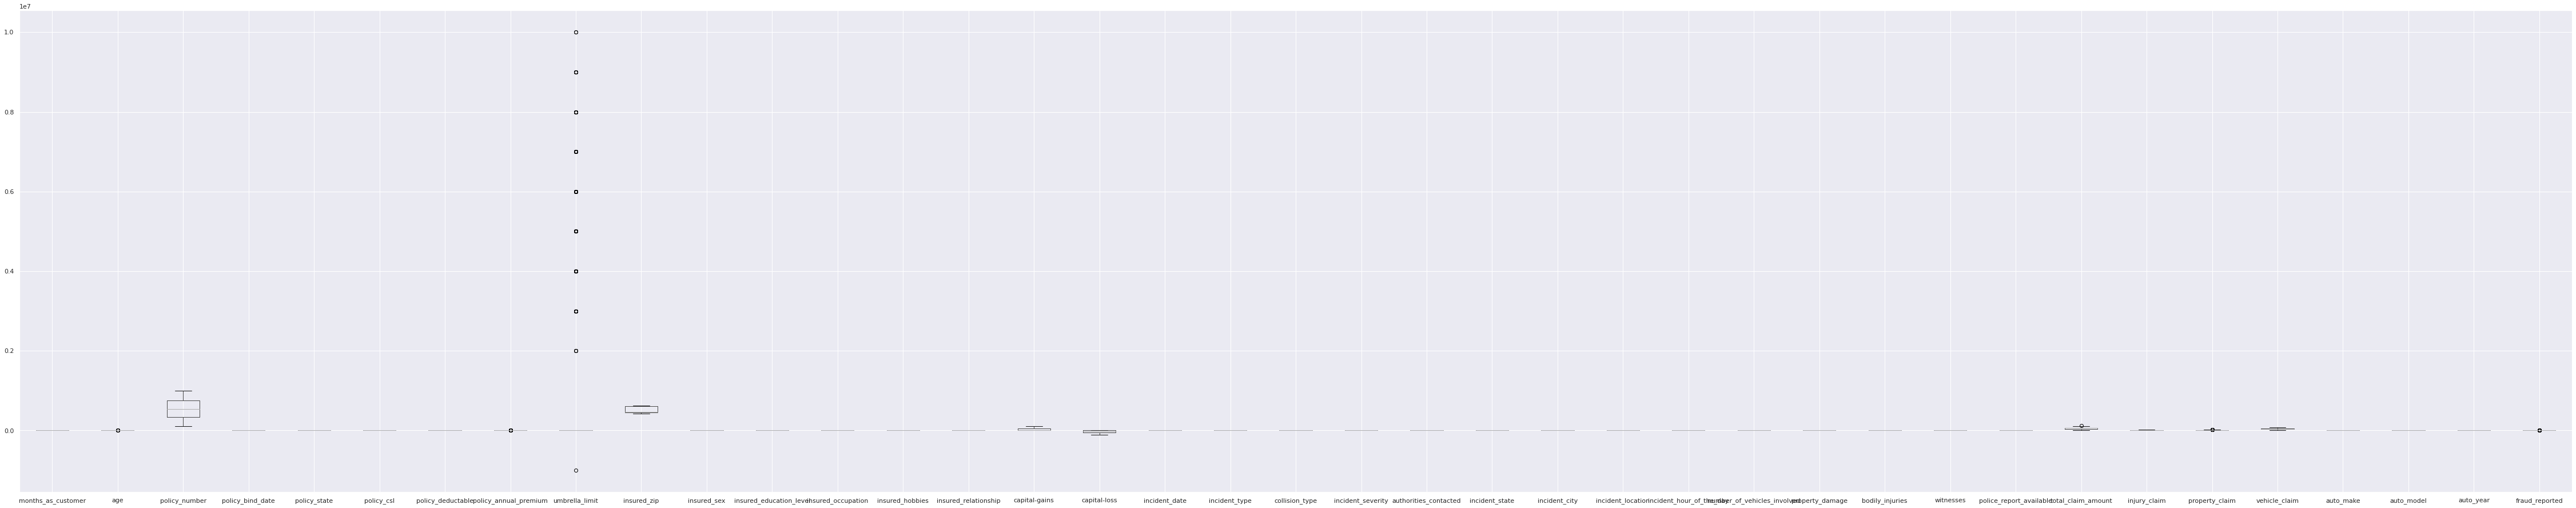

In [ ]:
df.iloc[:,:].boxplot(figsize=(80,15))
plt.subplots_adjust(bottom=0.1)
plt.show()

Following features contain outliers,
- age
- policy_annual_premium
- umbrella_limit
- total_claim_amount
- property_claim
- fraud reported

Except fraud reported rest all features mentioned are non categorical and hence their outliers can be removed.


In [ ]:
new_df_cap=df.copy()

In [ ]:
def remove_outliers(n):
  Q3=np.percentile(df[n],75,interpolation="midpoint")
  Q1=np.percentile(df[n],25,interpolation="midpoint")
  iqr=Q3-Q1
  percentile25=df[n].quantile(0.25)
  percentile75=df[n].quantile(0.75)
  upper_limit=percentile75+1.5*iqr
  lower_limit=percentile25-1.5*iqr
  df[df[n]>upper_limit]
  df[df[n]<lower_limit]

  new_df=df[df[n]<upper_limit]
  
  new_df_cap[n]=np.where(
      new_df_cap[n] > upper_limit,
      upper_limit,
      np.where(
          new_df_cap[n] < lower_limit,
          lower_limit,
          new_df_cap[n] ) 
      )
  sns.boxplot(new_df_cap[n])

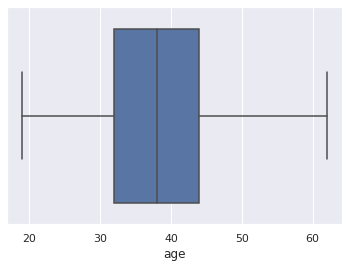

In [ ]:
remove_outliers("age")

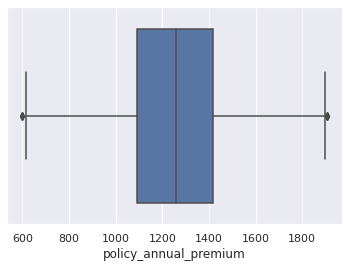

In [ ]:
remove_outliers("policy_annual_premium")

In [ ]:
def outliers_count(n):
   Q1=new_df_cap[n].quantile(0.25)
   Q3=new_df_cap[n].quantile(0.75)
   IQR=Q3-Q1
   outliers = new_df_cap[((new_df_cap[n]<(Q1-1.5*IQR)) | (new_df_cap[n]>(Q3+1.5*IQR)))]

   return outliers

In [ ]:
outliers = outliers_count("policy_annual_premium")
print('Number of remaining outliers in policy_annual_premium : '+ str(len(outliers)))

Number of remaining outliers in policy_annual_premium : 9


In [ ]:
while len(outliers)!=0:
  new_df_cap=new_df_cap.drop(new_df_cap["policy_annual_premium"].idxmax())
  outliers = outliers_count("policy_annual_premium")

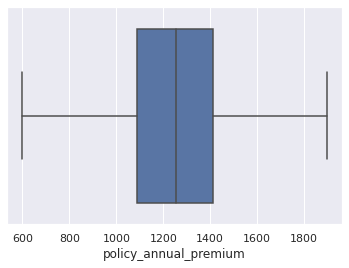

In [ ]:
remove_outliers("policy_annual_premium")

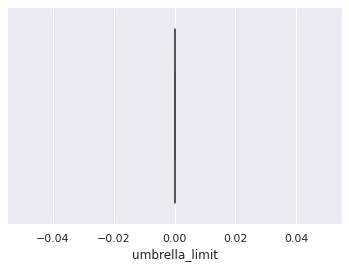

In [ ]:
remove_outliers("umbrella_limit")

In [ ]:
new_df_cap["umbrella_limit"].unique()

array([0.])

- Since one value wont provide significant contribution to target feature, hence we drop this column.

In [ ]:
new_df_cap=new_df_cap.drop(["umbrella_limit"],axis=1)

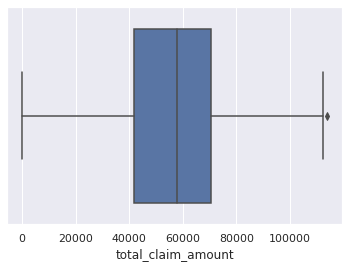

In [ ]:
remove_outliers("total_claim_amount")

In [ ]:
outliers = outliers_count("total_claim_amount")
print('Number of remaining outliers in total_claim_amount : '+ str(len(outliers)))

Number of remaining outliers in total_claim_amount : 1


In [ ]:
while len(outliers)!=0:
  new_df_cap=new_df_cap.drop(new_df_cap["total_claim_amount"].idxmax())
  outliers = outliers_count("total_claim_amount")

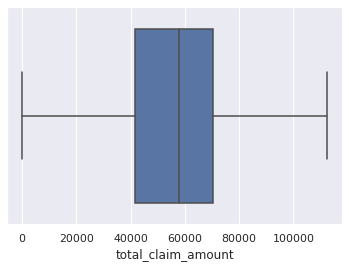

In [ ]:
remove_outliers("total_claim_amount")

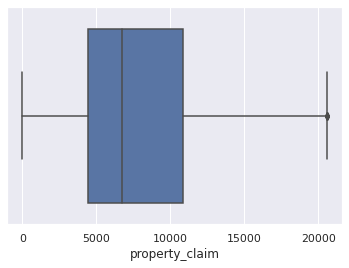

In [ ]:
remove_outliers("property_claim")

In [ ]:
outliers = outliers_count("property_claim")
print('Number of remaining outliers in property_claim : '+ str(len(outliers)))

Number of remaining outliers in property_claim : 5


In [ ]:
while len(outliers)!=0:
  new_df_cap=new_df_cap.drop(new_df_cap["property_claim"].idxmax())
  outliers = outliers_count("property_claim")

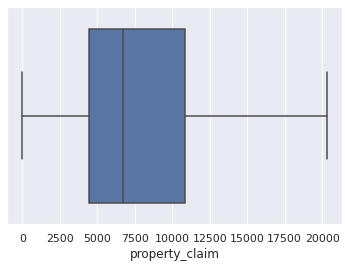

In [ ]:
remove_outliers("property_claim")

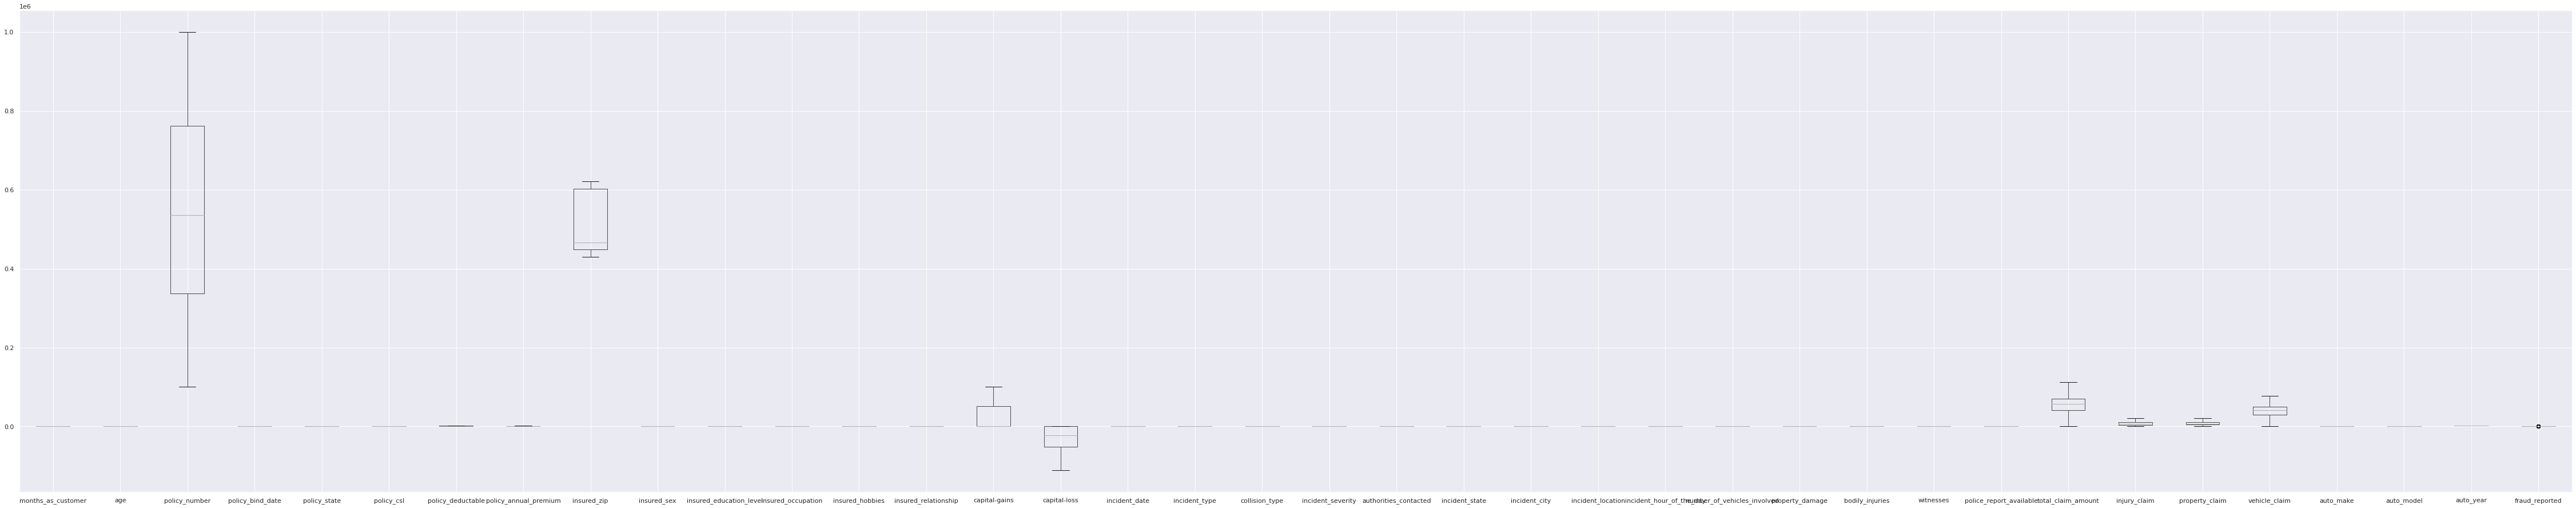

In [ ]:
new_df_cap.iloc[:,:].boxplot(figsize=(80,15))
plt.subplots_adjust(bottom=0.1)
plt.show()

#Separating Features

In [ ]:
x=new_df_cap.drop(['fraud_reported'],axis=1)
x.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_zip,insured_sex,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,328,48.0,521585,532,2,1,1000,1406.91,466132,1,...,1,2,1,71610.0,6510,13020.0,52080,10,1,2004
1,228,42.0,342868,821,1,1,2000,1197.22,468176,1,...,0,0,0,5070.0,780,780.0,3510,8,12,2007
2,134,29.0,687698,186,2,0,2000,1413.14,430632,0,...,2,3,0,34650.0,7700,3850.0,23100,4,30,2007
3,256,41.0,227811,766,0,1,2000,1415.74,608117,0,...,1,2,0,63400.0,6340,6340.0,50720,3,34,2014
4,228,44.0,367455,181,0,2,1000,1583.91,610706,1,...,0,1,0,6500.0,1300,650.0,4550,0,31,2009


In [ ]:
y=new_df_cap['fraud_reported']
y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int64

#Checking Skewness

In [ ]:
x.skew().sort_values()

vehicle_claim                 -0.628893
total_claim_amount            -0.610997
capital-loss                  -0.394960
incident_state                -0.141480
authorities_contacted         -0.123096
auto_model                    -0.086738
insured_occupation            -0.062078
auto_year                     -0.060811
policy_annual_premium         -0.050035
insured_hobbies               -0.048961
collision_type                -0.032495
policy_state                  -0.032159
incident_hour_of_the_day      -0.030806
auto_make                     -0.023322
insured_education_level        0.002112
incident_location              0.002761
policy_bind_date               0.003699
incident_date                  0.005529
bodily_injuries                0.018697
witnesses                      0.020221
policy_number                  0.030349
incident_city                  0.048907
insured_relationship           0.071725
policy_csl                     0.091752
incident_type                  0.105510


Keeping +/- 0.5 as the range of skewness, following features conatin skewness
- vehicle_claim                 
- total_claim_amount            
- number_of_vehicles_involved    
- police_report_available       
- insured_zip                  
- property_damage                
- fraud_reported                

Since vehicle_claim, total_claim_amount, number_of_vehicles_involved are the only non categorical features, hence their skewness can be removed

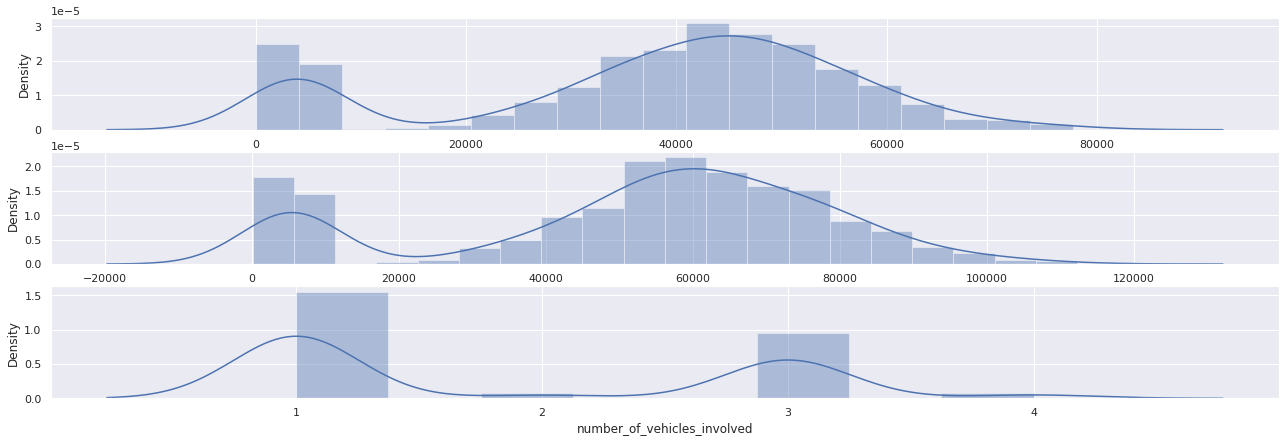

In [ ]:
sns.set()
fig,axes=plt.subplots(3,figsize=(22,7))
sns.distplot(x["vehicle_claim"],ax=axes[0])
sns.distplot(x["total_claim_amount"],ax=axes[1])
sns.distplot(x["number_of_vehicles_involved"],ax=axes[2])

In [ ]:
from sklearn.preprocessing import power_transform
list2=["vehicle_claim","total_claim_amount","number_of_vehicles_involved"]
for i in list2:
  x[i]=power_transform(x[i].values.reshape(-1,1))

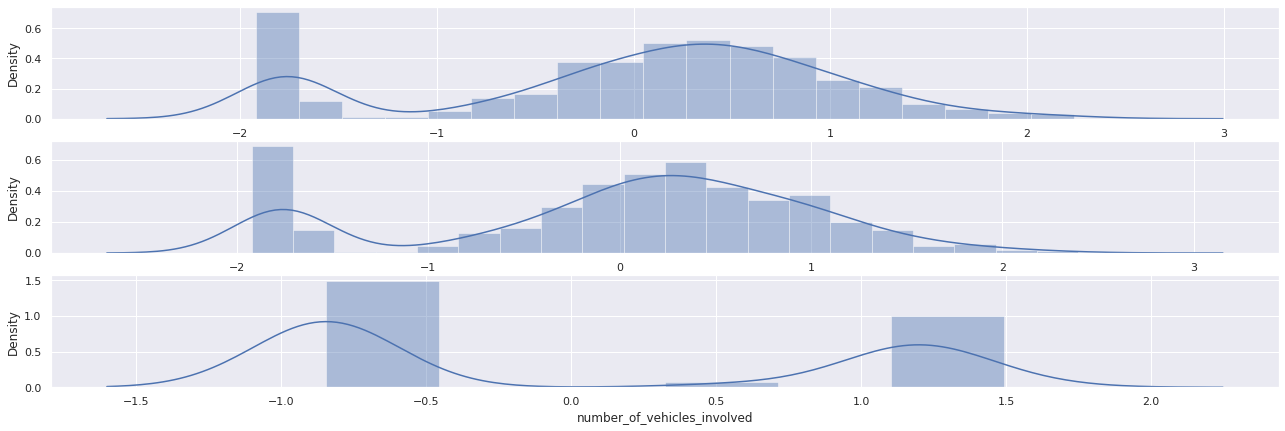

In [ ]:
sns.set()
fig,axes=plt.subplots(3,figsize=(22,7))
sns.distplot(x["vehicle_claim"],ax=axes[0])
sns.distplot(x["total_claim_amount"],ax=axes[1])
sns.distplot(x["number_of_vehicles_involved"],ax=axes[2])

In [ ]:
for i in list2:
  print(f"{i} skew: ",x[i].skew())

vehicle_claim skew:  -0.5316118206036295
total_claim_amount skew:  -0.5232504132122386
number_of_vehicles_involved skew:  0.3632004048372039


- Vehile claim and total claim amount are not still within skew range and hence we reapply tranform method further to see if the skewness can be reduced.

vehicle_claim skew:  -0.4229305068669221
total_claim_amount skew:  -0.43063053984516897


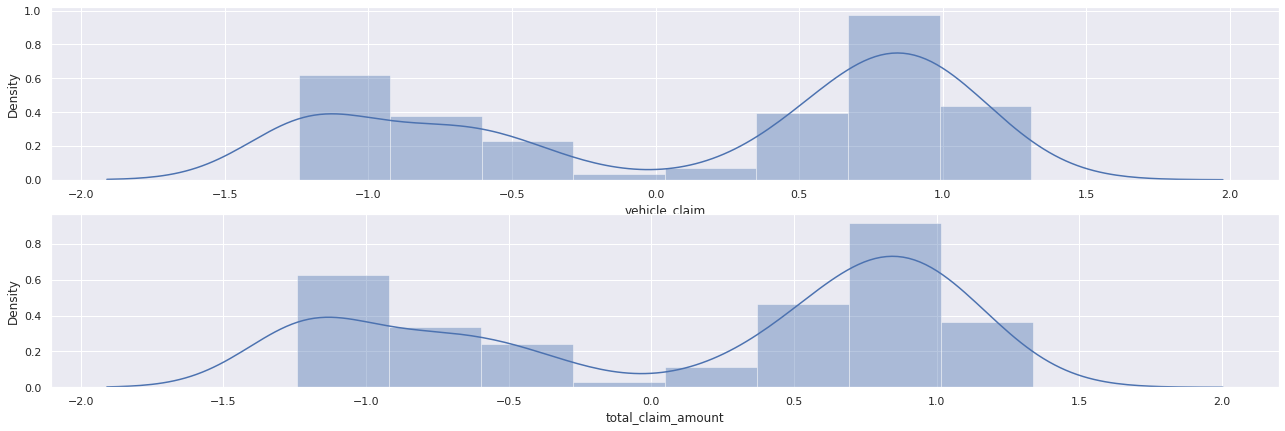

In [ ]:
n=np.cbrt(x["vehicle_claim"])
m=np.cbrt(x["total_claim_amount"])
sns.set()
fig,axes=plt.subplots(2,figsize=(22,7))
sns.distplot(n,ax=axes[0])
sns.distplot(m,ax=axes[1])
print("vehicle_claim skew: ",n.skew())
print("total_claim_amount skew: ",m.skew())

- The following features are within the skew range but there is no normal distribution and hence we apply method to check if distribution can further be improved.

vehicle_claim skew:  -0.40013947979951453
total_claim_amount skew:  -0.4174455081032878


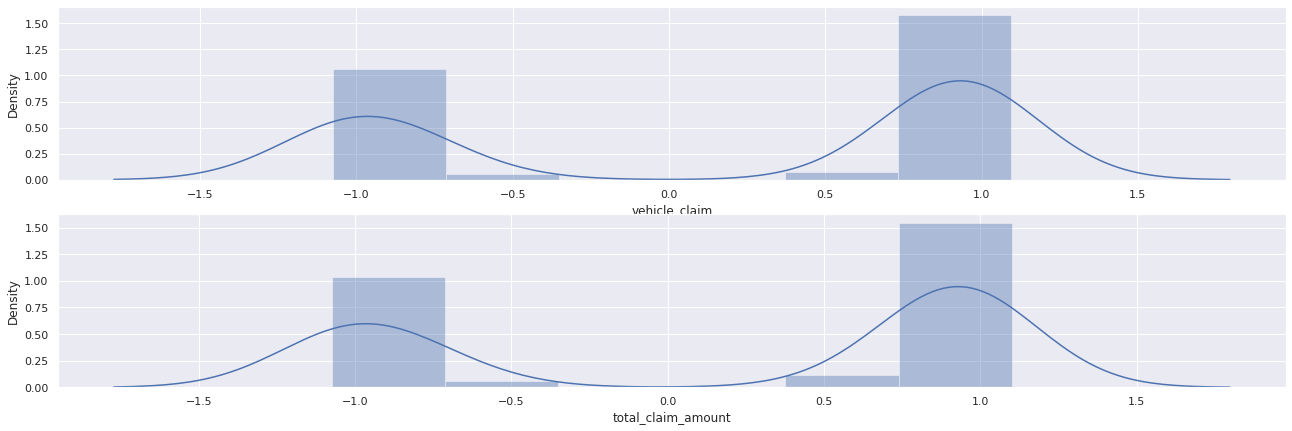

In [ ]:
n=np.cbrt(x["vehicle_claim"])
n=np.cbrt(n)
m=np.cbrt(x["total_claim_amount"])
m=np.cbrt(m)
sns.set()
fig,axes=plt.subplots(2,figsize=(22,7))
sns.distplot(n,ax=axes[0])
sns.distplot(m,ax=axes[1])
print("vehicle_claim skew: ",n.skew())
print("total_claim_amount skew: ",m.skew())

- Even though the distribution doesnt improve any further, since the skew values of the features are within the range, hence we keep the features.

In [ ]:
X["vehicle_claim"]=n
x["total_claim_amount"]=m

In [ ]:
x.skew().sort_values()

vehicle_claim                 -0.531612
total_claim_amount            -0.417446
capital-loss                  -0.394960
incident_state                -0.141480
authorities_contacted         -0.123096
auto_model                    -0.086738
insured_occupation            -0.062078
auto_year                     -0.060811
policy_annual_premium         -0.050035
insured_hobbies               -0.048961
collision_type                -0.032495
policy_state                  -0.032159
incident_hour_of_the_day      -0.030806
auto_make                     -0.023322
insured_education_level        0.002112
incident_location              0.002761
policy_bind_date               0.003699
incident_date                  0.005529
bodily_injuries                0.018697
witnesses                      0.020221
policy_number                  0.030349
incident_city                  0.048907
insured_relationship           0.071725
policy_csl                     0.091752
incident_type                  0.105510


#Detecting Multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
  vif=pd.DataFrame()
  vif["variable"]=X.columns
  vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

  return (vif)

In [ ]:
calc_vif(x)

,variable,VIF
0,months_as_customer,29.155939
1,age,135.247366
2,policy_number,5.724368
3,policy_bind_date,4.070707
4,policy_state,2.596518
5,policy_csl,2.469227
6,policy_deductable,4.643051
7,policy_annual_premium,29.790202
8,insured_zip,51.538584
9,insured_sex,1.916185


In [ ]:
X=x.drop(["auto_year","age"],axis=1)
calc_vif(X)

,variable,VIF
0,months_as_customer,4.342288
1,policy_number,5.651906
2,policy_bind_date,3.963550
3,policy_state,2.578135
4,policy_csl,2.458303
5,policy_deductable,4.551407
6,policy_annual_premium,24.912426
7,insured_zip,34.009028
8,insured_sex,1.904482
9,insured_education_level,3.415690


#Oversampling

In [ ]:
y.value_counts()

0    745
1    243
Name: fraud_reported, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x_new,y_new=smt.fit_resample(X,y)
y=y_new
y.value_counts()

1    745
0    745
Name: fraud_reported, dtype: int64

#Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mns=MinMaxScaler()
s=mns.fit_transform(x_new)
xs=pd.DataFrame(data=s)
print(xs)

            0         1         2    3    4         5         6         7   \
0     0.684760  0.468247  0.560000  1.0  0.5  0.333333  0.622231  0.188769   
1     0.475992  0.269370  0.864211  0.5  0.5  1.000000  0.460569  0.199478   
2     0.279749  0.653098  0.195789  1.0  0.0  1.000000  0.627034  0.002766   
3     0.534447  0.141334  0.806316  0.0  0.5  1.000000  0.629039  0.932699   
4     0.475992  0.296730  0.190526  0.0  1.0  0.333333  0.758691  0.946264   
...        ...       ...       ...  ...  ...       ...       ...       ...   
1485  0.661795  0.449289  0.410526  0.5  1.0  0.585333  0.593357  0.115699   
1486  0.212944  0.052454  0.605263  1.0  0.5  0.126667  0.363725  0.119020   
1487  0.599165  0.408497  0.221053  0.5  0.5  0.194000  0.488577  0.060380   
1488  0.584551  0.438589  0.836842  0.0  0.5  1.000000  0.557706  0.145375   
1489  0.931106  0.619989  0.605263  0.0  0.0  0.333333  0.439025  0.931336   

       8         9   ...   25   26        27   28        29    

#PCA

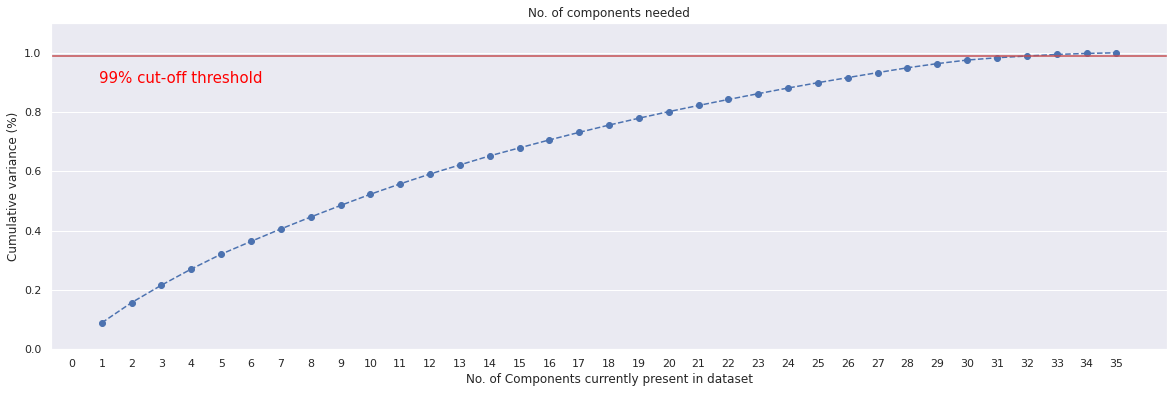

In [ ]:
from sklearn.decomposition import PCA
pca=PCA().fit(xs)

plt.rcParams["figure.figsize"] = (20,6)

fig, ax = plt.subplots()
a = np.arange(1, 36, step=1)
b = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(a, b, marker='o', linestyle='--', color='b')

plt.xlabel('No. of Components currently present in dataset')
plt.xticks(np.arange(0, 36, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('No. of components needed')

plt.axhline(y=0.99, color='r', linestyle='-')
plt.text(0.90, 0.90, '99% cut-off threshold', color = 'red', fontsize=15)
ax.grid(axis='x')
plt.show()

In [ ]:
pca = PCA(n_components = 32)
pca.fit(xs)
x = pca.transform(xs)
x.shape

(1490, 32)

#Training Testing

In [ ]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,auc,roc_curve,classification_report,confusion_matrix

In [ ]:
for i in range(1000):
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
  lg.fit(x,y)
  pred_train=lg.predict(x_train)
  pred_test=lg.predict(x_test)
  if round(accuracy_score(y_train,pred_train)*100,2)==round(accuracy_score(y_test,pred_test)*100,2):
    print("At random state = ",i)
    print("Training Accuracy: ",round(accuracy_score(y_train,pred_train)*100,2))
    print("Test Accuracy: ",round(accuracy_score(y_test,pred_test)*100,2))
    print("\n")

At random state =  19
Training Accuracy:  78.19
Test Accuracy:  78.19


At random state =  38
Training Accuracy:  78.19
Test Accuracy:  78.19


At random state =  59
Training Accuracy:  78.19
Test Accuracy:  78.19


At random state =  78
Training Accuracy:  78.19
Test Accuracy:  78.19


At random state =  94
Training Accuracy:  78.19
Test Accuracy:  78.19


At random state =  117
Training Accuracy:  78.19
Test Accuracy:  78.19


At random state =  127
Training Accuracy:  78.19
Test Accuracy:  78.19


At random state =  133
Training Accuracy:  78.19
Test Accuracy:  78.19


At random state =  146
Training Accuracy:  78.19
Test Accuracy:  78.19


At random state =  159
Training Accuracy:  78.19
Test Accuracy:  78.19


At random state =  172
Training Accuracy:  78.19
Test Accuracy:  78.19


At random state =  174
Training Accuracy:  78.19
Test Accuracy:  78.19


At random state =  187
Training Accuracy:  78.19
Test Accuracy:  78.19


At random state =  188
Training Accuracy:  78.19
Test Ac

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=999)
lg.fit(x,y)
pred_train=lg.predict(x_train)
pred_test=lg.predict(x_test)
print("Training Accuracy: ",round(accuracy_score(y_train,pred_train)*100,2))
print("Test Accuracy: ",round(accuracy_score(y_test,pred_test)*100,2))

Training Accuracy:  78.61
Test Accuracy:  76.51


In [ ]:
print("Classification report: \n",classification_report(y_test,pred_test))

Classification report: 
               precision    recall  f1-score   support

           0       0.76      0.72      0.74       139
           1       0.77      0.81      0.79       159

    accuracy                           0.77       298
   macro avg       0.76      0.76      0.76       298
weighted avg       0.77      0.77      0.76       298



#Cross Validation

In [ ]:
lss=accuracy_score(y_test,pred_test)
for j in range(2,20):
  cv_score=cross_val_score(lg,x,y,cv=j)
  print(cv_score)
  print("At CV: ",j)
  cv_mean=cv_score.mean()
  print("Cross Validation Score: ",round(cv_mean*100,2))
  print("Accuracy: ",round(lss*100,2))
  print("\n")

[0.66308725 0.78657718]
At CV:  2
Cross Validation Score:  72.48
Accuracy:  76.51


[0.60160966 0.7665996  0.81451613]
At CV:  3
Cross Validation Score:  72.76
Accuracy:  76.51


[0.62198391 0.74530831 0.80107527 0.83333333]
At CV:  4
Cross Validation Score:  75.04
Accuracy:  76.51


[0.63422819 0.72147651 0.7885906  0.81879195 0.82885906]
At CV:  5
Cross Validation Score:  75.84
Accuracy:  76.51


[0.62650602 0.64658635 0.77822581 0.7983871  0.83870968 0.81854839]
At CV:  6
Cross Validation Score:  75.12
Accuracy:  76.51


[0.62910798 0.64319249 0.75117371 0.8028169  0.81690141 0.84507042
 0.81132075]
At CV:  7
Cross Validation Score:  75.71
Accuracy:  76.51


[0.63636364 0.67914439 0.72043011 0.78494624 0.79032258 0.82795699
 0.83333333 0.82795699]
At CV:  8
Cross Validation Score:  76.26
Accuracy:  76.51


[0.65662651 0.65662651 0.6626506  0.75903614 0.80722892 0.79393939
 0.83636364 0.83030303 0.82424242]
At CV:  9
Cross Validation Score:  75.86
Accuracy:  76.51


[0.67114094 0.657

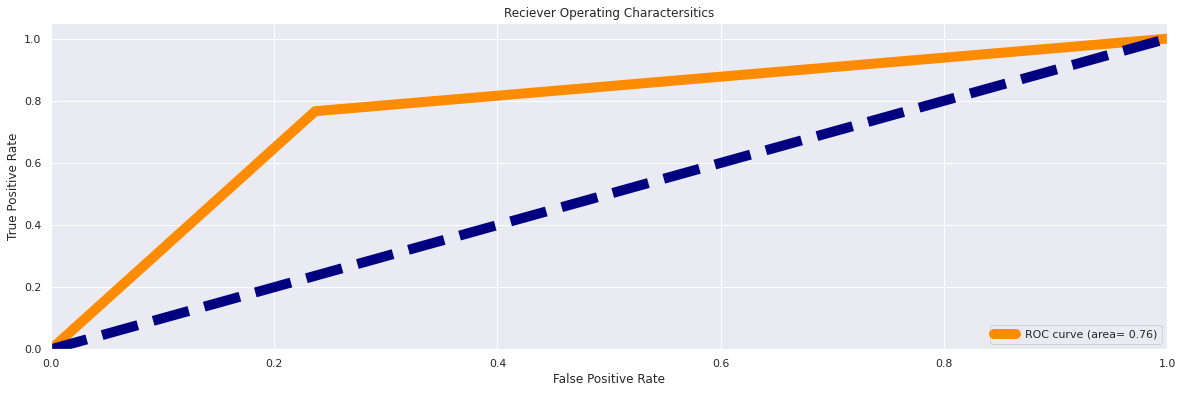

In [ ]:
fpr,tpr,thresholds=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color="darkorange",lw=10,label="ROC curve (area= %0.2f)"%roc_auc)
plt.plot([0,1],[0,1],lw=10,color="navy",linestyle='--')
plt.xlim([0,1.0])
plt.ylim([0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Reciever Operating Charactersitics")
plt.legend(loc="lower right")
plt.show()

#Model Selection

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc

def model_selection(algorithm_instance,x_train,y_train,x_test,y_test):
    algorithm_instance.fit(x_train,y_train)
    model_pred_train=algorithm_instance.predict(x_train)
    model_pred_test=algorithm_instance.predict(x_test)
    print("Accuracy of training model :",round(accuracy_score(y_train,model_pred_train)*100,2))
    print("Accuracy of test data :",round(accuracy_score(y_test,model_pred_test)*100,2))
    cv_score=cross_val_score(algorithm_instance,x,y,cv=5)
    print("cv score : ", round(cv_score.mean()*100,2))
    print("\nClassification report for test data\n",classification_report(y_test,model_pred_test))
    print("Classification report for training data\n",classification_report(y_train,model_pred_train))
    print("Confusion Matrix\n",confusion_matrix(y_test,model_pred_test))
    print("\n")
   
    fpr, tpr, thresholds = roc_curve(model_pred_test,y_test)
    roc_auc= auc(fpr,tpr)
    plt.figure()
    plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel("False POsitive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic")
    plt.legend(loc='lower right')
    plt.show()


#KNeighbors Classifier

Accuracy of training model : 78.02
Accuracy of test data : 71.14
cv score :  69.26

Classification report for test data
               precision    recall  f1-score   support

           0       0.91      0.42      0.58       139
           1       0.66      0.96      0.78       159

    accuracy                           0.71       298
   macro avg       0.78      0.69      0.68       298
weighted avg       0.77      0.71      0.69       298

Classification report for training data
               precision    recall  f1-score   support

           0       0.95      0.60      0.73       606
           1       0.70      0.97      0.81       586

    accuracy                           0.78      1192
   macro avg       0.83      0.78      0.77      1192
weighted avg       0.83      0.78      0.77      1192

Confusion Matrix
 [[ 59  80]
 [  6 153]]




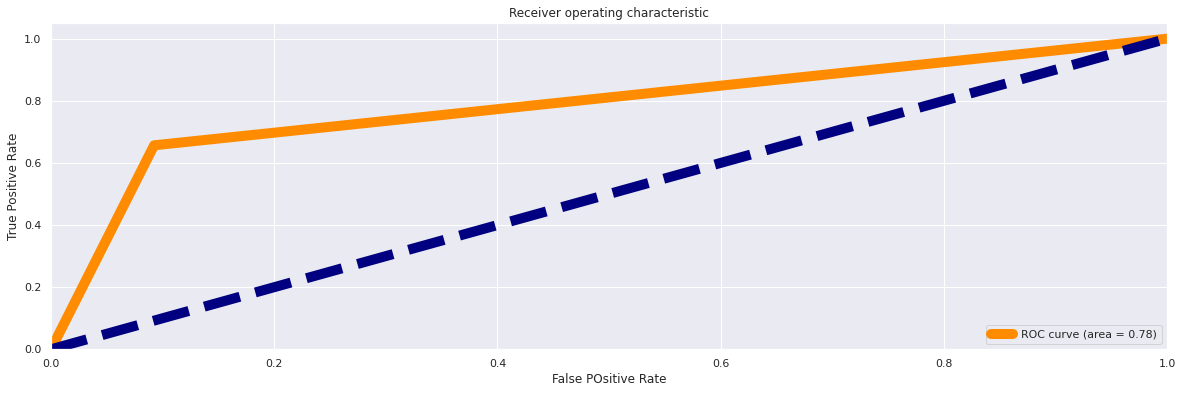

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k=KNeighborsClassifier()
model_selection(k,x_train,y_train,x_test,y_test)

# SVM Model

Accuracy of training model : 94.8
Accuracy of test data : 83.22
cv score :  83.36

Classification report for test data
               precision    recall  f1-score   support

           0       0.79      0.86      0.83       139
           1       0.87      0.81      0.84       159

    accuracy                           0.83       298
   macro avg       0.83      0.83      0.83       298
weighted avg       0.84      0.83      0.83       298

Classification report for training data
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       606
           1       0.96      0.93      0.95       586

    accuracy                           0.95      1192
   macro avg       0.95      0.95      0.95      1192
weighted avg       0.95      0.95      0.95      1192

Confusion Matrix
 [[120  19]
 [ 31 128]]




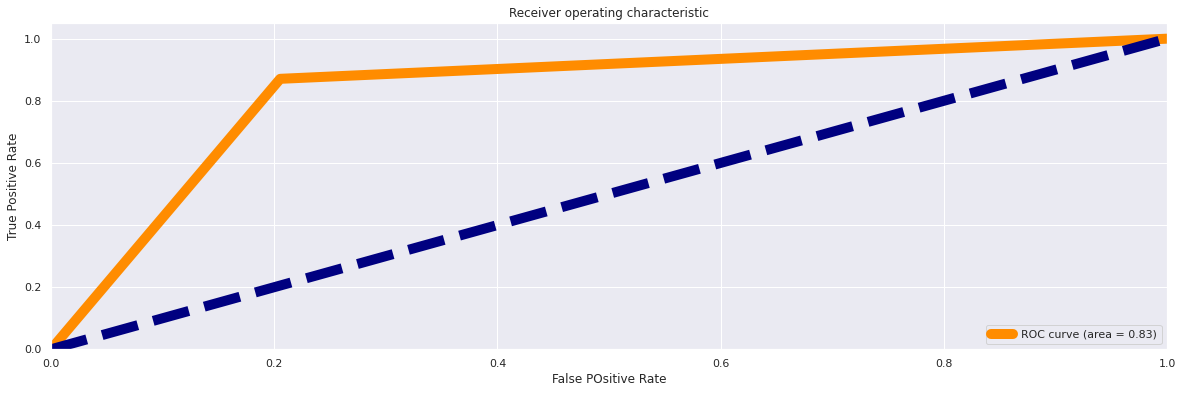

In [ ]:
from sklearn import svm
s=svm.SVC()
model_selection(s,x_train,y_train,x_test,y_test)

# DecisionTressClassifier Model

Accuracy of training model : 100.0
Accuracy of test data : 75.5
cv score :  70.27

Classification report for test data
               precision    recall  f1-score   support

           0       0.75      0.71      0.73       139
           1       0.76      0.79      0.78       159

    accuracy                           0.76       298
   macro avg       0.75      0.75      0.75       298
weighted avg       0.75      0.76      0.75       298

Classification report for training data
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       606
           1       1.00      1.00      1.00       586

    accuracy                           1.00      1192
   macro avg       1.00      1.00      1.00      1192
weighted avg       1.00      1.00      1.00      1192

Confusion Matrix
 [[ 99  40]
 [ 33 126]]




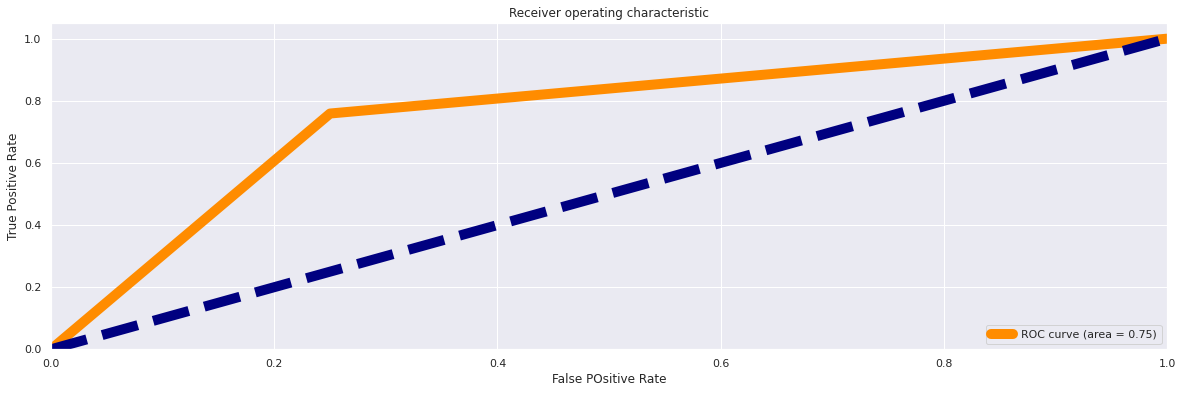

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
model_selection(dtc,x_train,y_train,x_test,y_test)

# Ensemble Methods

# RandomForestClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameter={'criterion':['gini', 'entropy', 'log_loss'],
          'max_features' : [None,"sqrt","log2"],
           'class_weight':['balanced',' balanced_subsample'],
           'oob_score':['True','False'],
           'n_estimators':range(0,100,25)}

rf=RandomForestClassifier()
clf=GridSearchCV(rf,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 75, 'oob_score': 'False'}


Accuracy of training model : 100.0
Accuracy of test data : 81.21
cv score :  80.34

Classification report for test data
               precision    recall  f1-score   support

           0       0.80      0.79      0.80       139
           1       0.82      0.83      0.83       159

    accuracy                           0.81       298
   macro avg       0.81      0.81      0.81       298
weighted avg       0.81      0.81      0.81       298

Classification report for training data
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       606
           1       1.00      1.00      1.00       586

    accuracy                           1.00      1192
   macro avg       1.00      1.00      1.00      1192
weighted avg       1.00      1.00      1.00      1192

Confusion Matrix
 [[110  29]
 [ 27 132]]




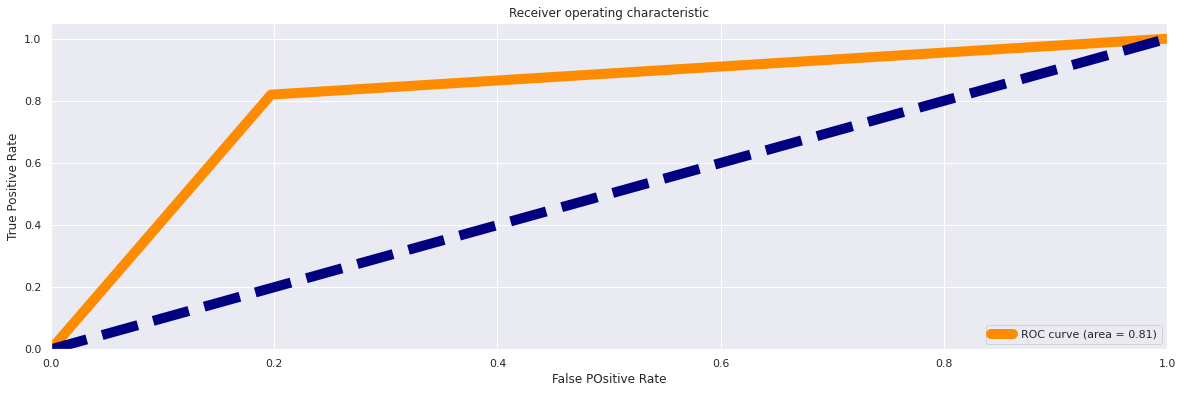

In [ ]:
rf=RandomForestClassifier(n_estimators=75, class_weight= 'balanced',criterion='entropy', max_features= 'sqrt', oob_score= 'True')
model_selection(rf,x_train,y_train,x_test,y_test)

# AdaBoostClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

parameter={'algorithm':['SAMME', 'SAMME.R'],
          'learning_rate' : [0.0,1.0],
           'random_state':range(0,100,25),
           'n_estimators':range(0,100,25)}

rf2=AdaBoostClassifier()
clf=GridSearchCV(rf2,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 75, 'random_state': 0}


Accuracy of training model : 88.67
Accuracy of test data : 78.52
cv score :  76.91

Classification report for test data
               precision    recall  f1-score   support

           0       0.77      0.78      0.77       139
           1       0.80      0.79      0.80       159

    accuracy                           0.79       298
   macro avg       0.78      0.78      0.78       298
weighted avg       0.79      0.79      0.79       298

Classification report for training data
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       606
           1       0.89      0.88      0.88       586

    accuracy                           0.89      1192
   macro avg       0.89      0.89      0.89      1192
weighted avg       0.89      0.89      0.89      1192

Confusion Matrix
 [[108  31]
 [ 33 126]]




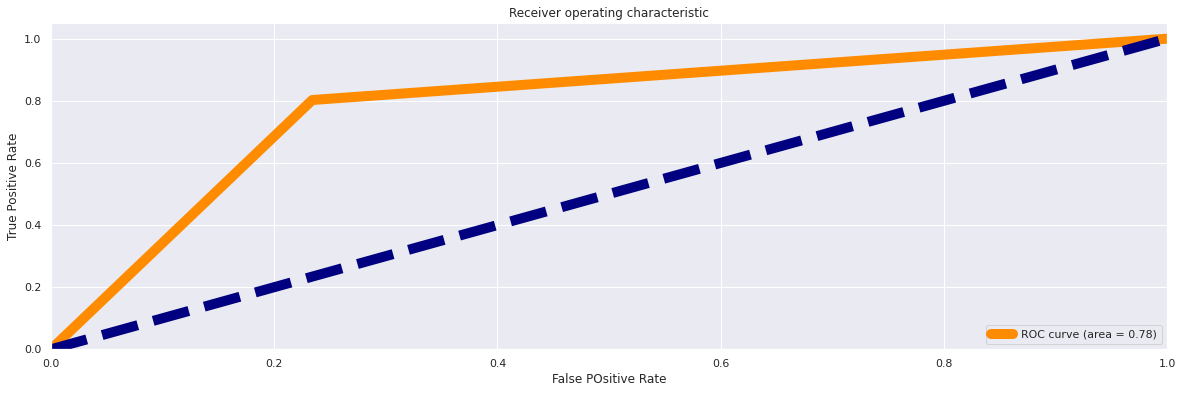

In [ ]:
rf2=AdaBoostClassifier(algorithm='SAMME.R', learning_rate= 1.0, n_estimators=75,random_state= 0)
model_selection(rf2,x_train,y_train,x_test,y_test)


# GradientBoostingClassifier



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

parameter={'loss':['log_loss', 'deviance', 'exponential'],
          'learning_rate' : [0.0,1.0],
           'criterion':['friedman_mse', 'squared_error', 'mse'],
           'max_features':['auto', 'sqrt', 'log2'],
           'n_estimators':range(0,100,25)}

rf3=GradientBoostingClassifier()
clf=GridSearchCV(rf3,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'learning_rate': 1.0, 'loss': 'exponential', 'max_features': 'auto', 'n_estimators': 75}


Accuracy of training model : 100.0
Accuracy of test data : 80.2
cv score :  78.79

Classification report for test data
               precision    recall  f1-score   support

           0       0.80      0.76      0.78       139
           1       0.80      0.84      0.82       159

    accuracy                           0.80       298
   macro avg       0.80      0.80      0.80       298
weighted avg       0.80      0.80      0.80       298

Classification report for training data
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       606
           1       1.00      1.00      1.00       586

    accuracy                           1.00      1192
   macro avg       1.00      1.00      1.00      1192
weighted avg       1.00      1.00      1.00      1192

Confusion Matrix
 [[106  33]
 [ 26 133]]




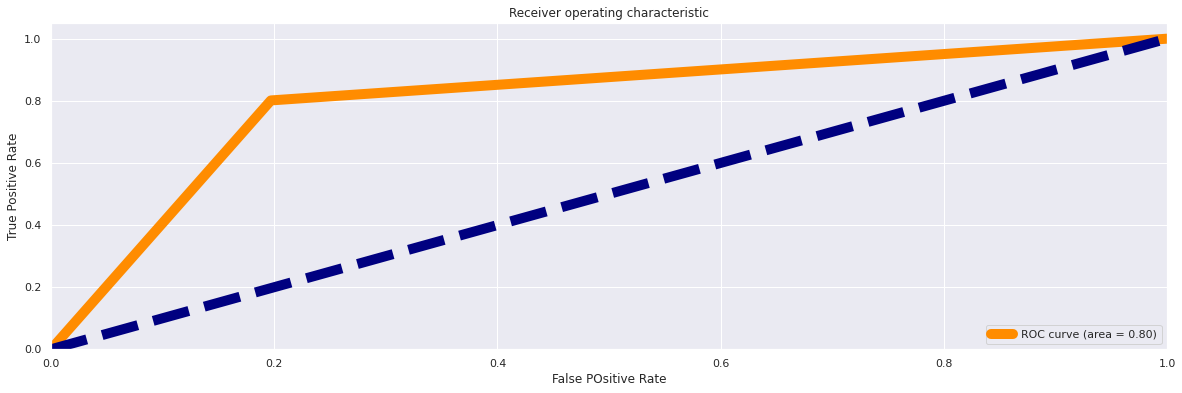

In [ ]:
rf3=GradientBoostingClassifier(criterion='mse',learning_rate=1.0, loss='exponential', max_features= 'auto', n_estimators= 75)
model_selection(rf3,x_train,y_train,x_test,y_test)

# BaggingClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

parameter={
           'oob_score': [True,False],
           'n_jobs':range(0,100,25),
           'random_state':range(0,100,25),
           'n_estimators':range(0,100,25)}

rf4=BaggingClassifier()
clf=GridSearchCV(rf4,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'n_estimators': 75, 'n_jobs': 25, 'oob_score': True, 'random_state': 0}


Accuracy of training model : 100.0
Accuracy of test data : 79.53
cv score :  77.79

Classification report for test data
               precision    recall  f1-score   support

           0       0.78      0.78      0.78       139
           1       0.81      0.81      0.81       159

    accuracy                           0.80       298
   macro avg       0.79      0.79      0.79       298
weighted avg       0.80      0.80      0.80       298

Classification report for training data
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       606
           1       1.00      1.00      1.00       586

    accuracy                           1.00      1192
   macro avg       1.00      1.00      1.00      1192
weighted avg       1.00      1.00      1.00      1192

Confusion Matrix
 [[109  30]
 [ 31 128]]




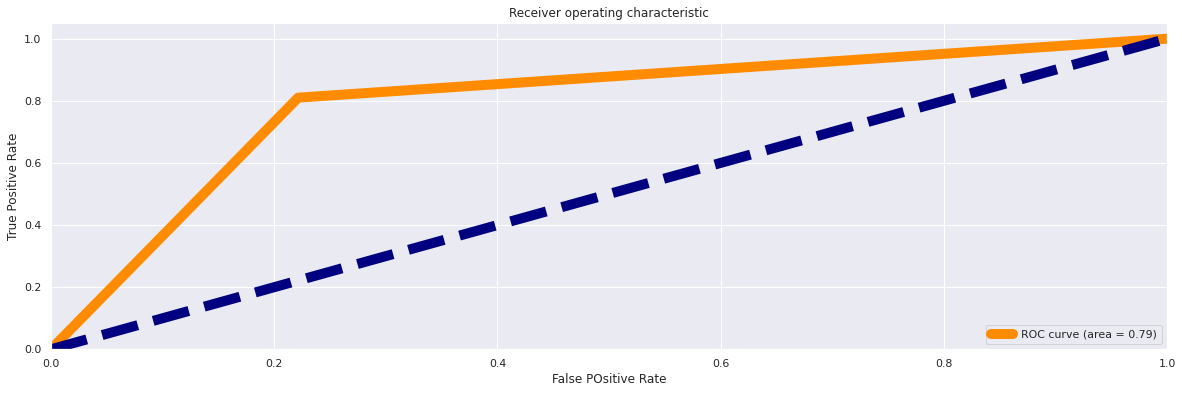

In [ ]:
rf4=BaggingClassifier(n_jobs=25, oob_score= True, random_state=0, n_estimators= 75)
model_selection(rf4,x_train,y_train,x_test,y_test)


# StackingClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

estimators = [ ('knc', KNeighborsClassifier()), ('svr',SVC()) ]
parameter={
            'stack_method':['auto', 'predict_proba', 'decision_function', 'predict'],
           'n_jobs':range(0,100,25)
         }

rf5=StackingClassifier(estimators)
clf=GridSearchCV(rf5,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'n_jobs': 25, 'stack_method': 'predict'}


Accuracy of training model : 94.8
Accuracy of test data : 83.22
cv score :  83.36

Classification report for test data
               precision    recall  f1-score   support

           0       0.79      0.86      0.83       139
           1       0.87      0.81      0.84       159

    accuracy                           0.83       298
   macro avg       0.83      0.83      0.83       298
weighted avg       0.84      0.83      0.83       298

Classification report for training data
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       606
           1       0.96      0.93      0.95       586

    accuracy                           0.95      1192
   macro avg       0.95      0.95      0.95      1192
weighted avg       0.95      0.95      0.95      1192

Confusion Matrix
 [[120  19]
 [ 31 128]]




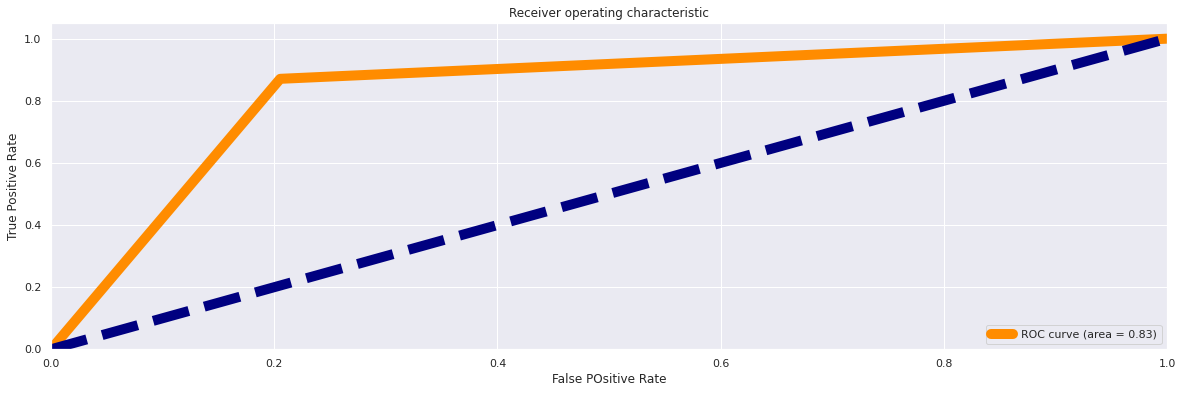

In [ ]:
rf5=StackingClassifier(estimators,n_jobs=25, stack_method= 'predict')
model_selection(rf5,x_train,y_train,x_test,y_test)


# Model Saving

In [ ]:
import pickle
filename='rfz.pk1'
pickle.dump(rf5,open(filename,'wb'))

We selected Stacking Classifier model since
- it has best cross validation score among all the model and high accuracy.
- it has highest auc score of 0.83

# Loading Model

In [ ]:
loaded_model=pickle.load(open('rfz.pk1','rb'))
result=loaded_model.score(x_test,y_test)
print("Model Accuracy: ",result*100)

Model Accuracy:  83.22147651006712


# Testing Loaded Model

In [ ]:
def test_inp():
  inp = []
  n=int(input("Enter row number of the input X:"))
  print(f"\nAll the column values of {n}th row are fed into loaded model to predict the output Y.")
  for i in X.iloc[n]:
    inp.append(i)
  input_data_as_numpy_array = np.asarray(inp)
  input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
  prediction = loaded_model.predict(input_data_reshaped)
  if prediction[0]==0:
      print("\nFraud Detected: No")
  if prediction[0]==1:
      print("\nFraud Detected: Yes")

In [ ]:
X=pd.DataFrame(x)
Y=pd.DataFrame(y)
print("Input\n",X.head(),"\n\nOutput\n",Y.head())

Input
          0         1         2         3         4         5         6   \
0  0.510101  1.036444  0.669462  0.714134  0.200574  0.150958  0.282341   
1  1.166554  0.120067 -0.296676 -0.555150 -0.100773  0.354995  0.070028   
2 -0.054903 -0.091097 -0.757675  0.386633  0.002105  0.084317 -0.332517   
3  0.003534 -0.688708  0.358739 -0.174048 -0.226174  0.575415 -1.050679   
4  0.951906 -0.106064 -0.385198 -0.731471  0.163298  0.441562 -0.125062   

         7         8         9   ...        22        23        24        25  \
0  0.064555 -0.024466  0.298558  ... -0.331013  0.267855 -0.307450  0.139351   
1  0.035889  0.365566 -0.344189  ... -0.119912 -0.101603 -0.226675 -0.215094   
2 -0.655072  0.317014 -0.391087  ... -0.182024 -0.233651  0.405017 -0.098717   
3  0.112781 -0.081949 -0.044705  ... -0.416488 -0.069984  0.178154  0.011880   
4  0.432242 -0.596435 -0.006228  ... -0.114542  0.020519  0.452565 -0.339729   

         26        27        28        29        30        31

In above table we have seen that 
- Input 0th row gives output 1 i.e Fraud Detected:Y 
- Input 1st row gives output 1 i.e Fraud Detected:Y 
- Input 2nd row gives output 0 i.e Fraud Detected:N 
- Input 3rd row gives output 1 i.e Fraud Detected:Y 
- Input 4th row gives output 1 i.e Fraud Detected:N 

So we can use this input data with loaded model to test if model gives correct output

In [ ]:
test_inp()

Enter row number of the input X: 0

All the column values of 0th row are fed into loaded model to predict the output Y.

Fraud Detected: Yes


In [ ]:
test_inp()

Enter row number of the input X: 4

All the column values of 4th row are fed into loaded model to predict the output Y.

Fraud Detected: No
